## A Year of Football - Review of the top 5 leagues of football.

This analysis is an attempt  to understand the 2019/20 in numbers and see which players performed well. This could be used to suggest players that could be bought by different clubs (especially, Manchester United as i support them) . The data is obtained from fbRef.com. 

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("./data/big5_full_stats.csv")

In [9]:
data.iloc[0].axes

[Index(['player', 'nationality', 'position', 'squad', 'comp_level', 'age',
        'birth_year', 'games', 'playing_games_starts', 'playing_minutes',
        ...
        'dribbles_players_dribbled_past', 'dribbles_nutmegs', 'carries_carries',
        'carries_carry_distance', 'carries_carry_progressive_distance',
        'receiving_pass_targets', 'receiving_passes_received',
        'receiving_passes_received_pct', 'miscontrols', 'dispossessed'],
       dtype='object', length=145)]

### Number of Players in each league

In [10]:
data.comp_level.value_counts()

Serie A           580
La Liga           570
Ligue 1           542
Premier League    522
Bundesliga        498
Name: comp_level, dtype: int64

### Number of Players in each position

In [11]:
data.position.value_counts()

DF       871
MF       592
MF,FW    492
FW       385
GK       199
DF,MF    132
DF,FW     41
Name: position, dtype: int64

In [12]:
data[data.position=="DF,FW"]

,player,nationality,position,squad,comp_level,age,birth_year,games,playing_games_starts,playing_minutes,...,dribbles_players_dribbled_past,dribbles_nutmegs,carries_carries,carries_carry_distance,carries_carry_progressive_distance,receiving_pass_targets,receiving_passes_received,receiving_passes_received_pct,miscontrols,dispossessed
23,Kevin Agudelo,COL,"DF,FW",Fiorentina,Serie A,20.0,1998.0,2,0,10,...,0.0,0.0,7.0,58.0,26.0,9.0,6.0,66.7,0.0,0.0
135,Youcef Attal,ALG,"DF,FW",Nice,Ligue 1,23.0,1996.0,13,12,"1,003",...,43.0,3.0,556.0,4743.0,3389.0,621.0,512.0,82.4,38.0,29.0
238,Karim Bellarabi,GER,"DF,FW",Leverkusen,Bundesliga,29.0,1990.0,26,17,"1,424",...,53.0,5.0,763.0,5866.0,3898.0,881.0,713.0,80.9,27.0,41.0
335,Denis Bouanga,GAB,"DF,FW",Saint-Étienne,Ligue 1,24.0,1994.0,26,23,"2,042",...,73.0,4.0,748.0,6073.0,3860.0,1015.0,680.0,67.0,71.0,78.0
501,Federico Chiesa,ITA,"DF,FW",Fiorentina,Serie A,21.0,1997.0,32,29,"2,458",...,57.0,5.0,858.0,6655.0,4432.0,1163.0,792.0,68.1,52.0,55.0
517,Ibrahim Cissé,CIV,"DF,FW",Nice,Ligue 1,20.0,1999.0,2,0,50,...,0.0,0.0,37.0,286.0,222.0,39.0,39.0,100.0,0.0,0.0
556,Maxwel Cornet,CIV,"DF,FW",Lyon,Ligue 1,22.0,1996.0,22,14,"1,330",...,23.0,0.0,587.0,3895.0,2462.0,721.0,570.0,79.1,25.0,26.0
583,Juan Cuadrado,COL,"DF,FW",Juventus,Serie A,31.0,1988.0,32,27,"2,564",...,52.0,0.0,1785.0,10029.0,7017.0,2013.0,1885.0,93.6,22.0,30.0
813,Ansu Fati,ESP,"DF,FW",Barcelona,La Liga,16.0,2002.0,24,11,"1,027",...,26.0,1.0,590.0,4224.0,2860.0,702.0,600.0,85.5,34.0,22.0
852,Alessandro Florenzi,ITA,"DF,FW",Roma,Serie A,28.0,1991.0,14,12,997,...,4.0,1.0,480.0,3065.0,1915.0,558.0,510.0,91.4,5.0,5.0


In [17]:
list(data.columns)

['player',
 'nationality',
 'position',
 'squad',
 'comp_level',
 'age',
 'birth_year',
 'games',
 'playing_games_starts',
 'playing_minutes',
 'playing_goals',
 'performance_assists',
 'performance_pens_made',
 'performance_pens_att',
 'performance_cards_yellow',
 'performance_cards_red',
 'performance_goals_per90',
 'per90_assists_per90',
 'per90_goals_assists_per90',
 'per90_goals_pens_per90',
 'per90_goals_assists_pens_per90',
 'per90_xg',
 'expected_npxg',
 'expected_xa',
 'expected_xg_per90',
 'per90_xa_per90',
 'per90_xg_xa_per90',
 'per90_npxg_per90',
 'per90_npxg_xa_per90',
 'per90_matches',
 'tackles_tackles',
 'tackles_tackles_won',
 'tackles_tackles_def_3rd',
 'tackles_tackles_mid_3rd',
 'tackles_tackles_att_3rd',
 'dribbles_def_dribble_tackles',
 'dribbles_def_dribbles_vs',
 'dribbles_def_dribble_tackles_pct',
 'dribbles_def_dribbled_past',
 'pressures_pressures',
 'pressures_pressure_regains',
 'pressures_pressure_regain_pct',
 'pressures_pressures_def_3rd',
 'pressures_p

### Filter out regular players. (Those who have played majority of the season)

In [135]:
regular = data[data.playing_minutes_pct > 60]

### Finding Similar Players to the ones perfoming well at city, liverpool and other top clubs that can help United 

In [167]:
midfielders = regular[regular.position.isin(["MF", "DF,MF"])]

In [168]:
creative_mid_stats = ["player", "playing_minutes_pct","per90_goals_assists_pens_per90", "expected_xa", "expected_xg_per90", "per90_xg", "per90_npxg_xa_per90", "pressures_pressures_mid_3rd", "pressures_pressures_att_3rd", "interceptions", "starts_minutes_per_start", "sca_sca_per90", "gca_gca_per90", "sca_types_sca_dribbles", "gca_types_gca_dribbles", "passes_total_passes_progressive_distance", "passes_medium_passes_pct_medium", "passes_long_passes_pct_long","passes_into_final_third", "passes_into_penalty_area", "crosses_into_penalty_area", "team_success_plus_minus_per90", "touches_touches_mid_3rd", "touches_touches_att_3rd", "touches_touches_att_pen_area", "dribbles_dribbles_completed_pct", "dribbles_nutmegs"]

In [169]:
cols = creative_mid_stats[:]
cols.remove("player")
creative_values = midfielders[cols].values

In [170]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(creative_values)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 204 samples in 0.000s...
[t-SNE] Computed neighbors for 204 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 204 / 204
[t-SNE] Mean sigma: 547.431303
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.388199
[t-SNE] KL divergence after 300 iterations: 0.115083
t-SNE done! Time elapsed: 0.29213714599609375 seconds


In [171]:
creative_mid = midfielders[creative_mid_stats]

In [172]:
creative_mid["t-sne-1d"] = tsne_results[:, 0]
creative_mid["t-sne-2d"] = tsne_results[:, 1]

/home/mancunian92/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/mancunian92/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [173]:
kmeans_model = KMeans(n_clusters=5)

In [174]:
kmeans_model.fit(creative_mid.drop(["t-sne-1d", "t-sne-2d", "player"], axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [175]:
creative_mid["class"] = kmeans_model.predict(creative_values)

/home/mancunian92/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


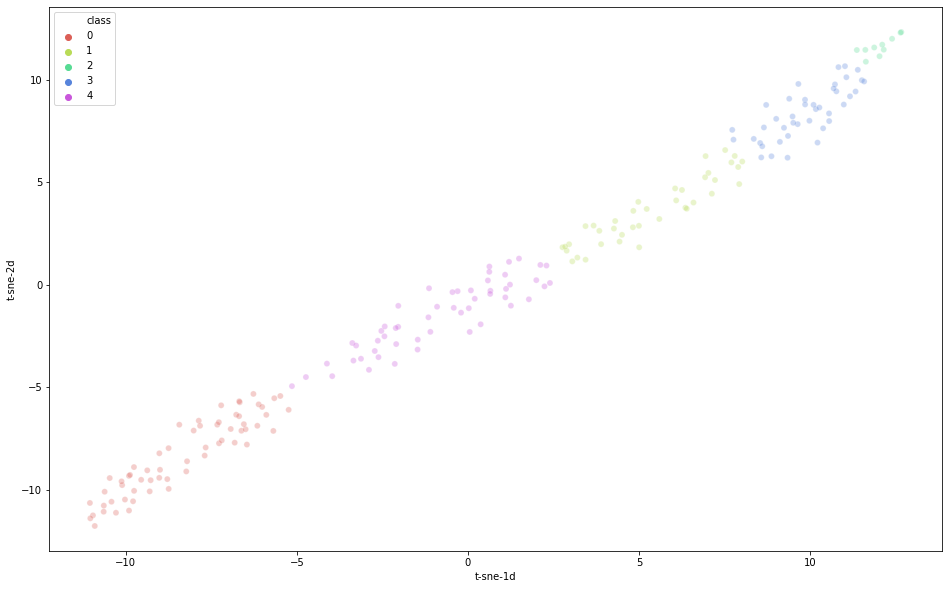

In [176]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="t-sne-1d", y="t-sne-2d",
    hue="class",
    palette=sns.color_palette("hls", 5),
    data=creative_mid,
    legend="full",
    alpha=0.3
)

In [177]:
creative_mid["class"].value_counts()

0    61
4    53
3    41
1    39
2    10
Name: class, dtype: int64

In [179]:
list(creative_mid[creative_mid["class"]==2]["player"])

['Luis Alberto',
 'Éver Banega',
 'Sergio Busquets',
 'José Campaña',
 'Kevin De Bruyne',
 'Joshua Kimmich',
 'Toni Kroos',
 'Oliver Norwood',
 'Daniel Parejo',
 'Rodri']